## Import libraries

In [1]:
#from __future__ import print_function

import tensorflow as tf
import keras
from keras.datasets import mnist, fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from functools import partial

## Define initial variables

In [2]:
num_classes = 10 #defined from datasets
epochs = 10
validation_size = 0.1

## Create functions

### Train test split

In [3]:
def split_train_test_valid(dataset, verbose=False, rand_permute=False):
  (X_train, y_train), (X_test, y_test) = dataset.load_data()
  if rand_permute:
    if verbose:
      print("Creating random permutation")
    # I have checked the permuted and non permuted datasets with the same
    # randomstate and the columns are correctly permuted, i.e. the values
    # from the rows in the columns match
    X = np.concatenate((X_train.reshape(X_train.shape[0], 784), X_test.reshape(X_test.shape[0], 784)))
    X = np.random.permutation(X.T)
    X_train = X.T[:X_train.shape[0]]
    X_test = X.T[-X_test.shape[0]:]
    X_train = X_train.reshape(X_train.shape[0], 28,28)
    X_test = X_test.reshape(X_test.shape[0], 28,28)

  X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=validation_size)#, random_state=1)

  X_train = X_train.reshape(int(60000 * (1.0 - validation_size)), 28, 28, 1)
  X_test = X_test.reshape(10000, 28, 28, 1)
  X_valid = X_valid.reshape(int(60000 * validation_size), 28, 28, 1)

  X_train = X_train.astype('float32')
  X_test = X_test.astype('float32')
  X_valid = X_valid.astype('float32')

  X_train /= 255
  X_test /= 255
  X_valid /= 255

  # convert class vectors to binary class matrices
  y_train = keras.utils.to_categorical(y_train, num_classes)
  y_test = keras.utils.to_categorical(y_test, num_classes)
  y_valid = keras.utils.to_categorical(y_valid, num_classes)
  
  if verbose:
    print(X_train.shape, 'train samples')
    print(X_test.shape, 'test samples')
    print(X_valid.shape, 'validation samples')

    print(y_train.shape, 'train labels')
    print(y_test.shape, 'test labels')
    print(y_valid.shape, 'validation labels')

  return X_train, y_train, X_test, y_test, X_valid, y_valid

### Train model

In [4]:
def trainModel(model, X_train, y_train, X_valid, y_valid, verbose):
  model.compile(loss="categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"])
  #track epoch loss history
  if not verbose:
    history = model.fit(X_train, y_train, epochs=epochs,verbose = 0,
                        validation_data=(X_valid, y_valid))
  else:
    history = model.fit(X_train, y_train, epochs=epochs,
                        validation_data=(X_valid, y_valid))
  return history

### Plot loss over epochs

In [5]:
def pltHistory(history):
  pd.DataFrame(history.history).plot(figsize=(8, 5))
  plt.grid(True)
  plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
  plt.show()

### Execute experiments for a given model and dataset

In [6]:
def doExperiment(model, dataset, verbose=False, rand_permute=False, plot_hist=True):
  X_train, y_train, X_test, y_test, X_valid, y_valid = split_train_test_valid(dataset, verbose, rand_permute)
  print("--- Training Model ...")
  history = trainModel(model, X_train, y_train, X_valid, y_valid, verbose)
  if plot_hist == True:
    print("--- History:")
    pltHistory(history)
    print("--- Evaluation:")
  return model.evaluate(X_test, y_test)

## MLP Experiments

In [7]:
mlp_model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[28, 28, 1]),
  keras.layers.Dense(300, activation="relu"),
  keras.layers.Dense(100, activation="relu"),
  keras.layers.Dense(10, activation="softmax")
])

### mnist dataset

Creating random permutation
(54000, 28, 28, 1) train samples
(10000, 28, 28, 1) test samples
(6000, 28, 28, 1) validation samples
(54000, 10) train labels
(10000, 10) test labels
(6000, 10) validation labels
--- Training Model ...
Epoch 1/10
1688/1688 [==============================] - 5s 3ms/step - loss: 1.0392 - accuracy: 0.7329 - val_loss: 0.3285 - val_accuracy: 0.9070
Epoch 2/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3093 - accuracy: 0.9135 - val_loss: 0.2566 - val_accuracy: 0.9250
Epoch 3/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2424 - accuracy: 0.9318 - val_loss: 0.2124 - val_accuracy: 0.9402
Epoch 4/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2055 - accuracy: 0.9417 - val_loss: 0.1864 - val_accuracy: 0.9442
Epoch 5/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.1754 - accuracy: 0.9488 - val_loss: 0.1676 - val_accuracy: 0.9515
Epoch 6/10
1688/1688 [===========================

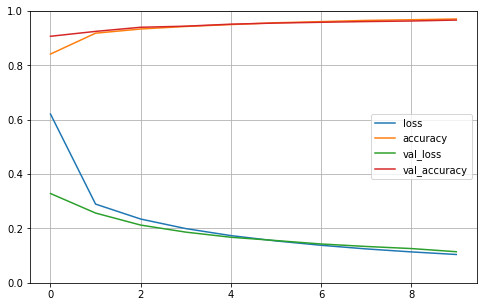

--- Evaluation:
313/313 [==============================] - 0s 1ms/step - loss: 0.1091 - accuracy: 0.9668


[0.10908708721399307, 0.9667999744415283]

In [8]:
doExperiment(mlp_model, mnist, verbose=True, rand_permute=True, plot_hist=True)

### fashion_mnist dataset

Creating random permutation
(54000, 28, 28, 1) train samples
(10000, 28, 28, 1) test samples
(6000, 28, 28, 1) validation samples
(54000, 10) train labels
(10000, 10) test labels
(6000, 10) validation labels
--- Training Model ...
Epoch 1/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.7685 - accuracy: 0.7418 - val_loss: 0.4829 - val_accuracy: 0.8258
Epoch 2/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4592 - accuracy: 0.8374 - val_loss: 0.4293 - val_accuracy: 0.8485
Epoch 3/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4112 - accuracy: 0.8535 - val_loss: 0.4202 - val_accuracy: 0.8542
Epoch 4/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3803 - accuracy: 0.8646 - val_loss: 0.4095 - val_accuracy: 0.8543
Epoch 5/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3634 - accuracy: 0.8701 - val_loss: 0.3684 - val_accuracy: 0.8682
Epoch 6/10
1688/1688 [===========================

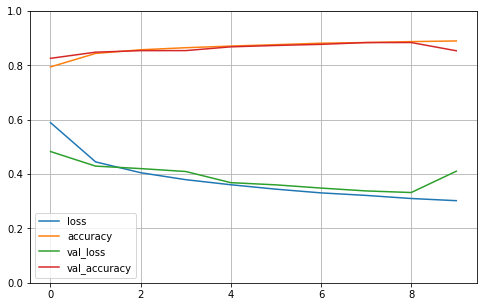

--- Evaluation:
313/313 [==============================] - 0s 1ms/step - loss: 0.4429 - accuracy: 0.8429


[0.44285160303115845, 0.8428999781608582]

In [9]:
doExperiment(mlp_model, fashion_mnist, verbose=True, rand_permute=True, plot_hist=True)

### MLP settings experiments

layers

In [10]:
mlp_scores = {}
for l1 in range(0,301, 100): 
  for l2 in range(0,301,100):
    for l3 in range(0,301, 100):
      mlp_model = keras.models.Sequential([keras.layers.Flatten(input_shape=[28, 28, 1])])
      if not l1 == 0: 
        mlp_model.add(keras.layers.Dense(l1, activation="relu"))
      if not l2 == 0: 
        mlp_model.add(keras.layers.Dense(l2, activation="relu"))
      if not l3 == 0: 
        mlp_model.add(keras.layers.Dense(l3, activation="relu"))
      mlp_model.add(keras.layers.Dense(10, activation="softmax"))
      #print(mlp_model.summary())
      score = doExperiment(mlp_model, fashion_mnist, verbose=False, plot_hist=False)
      mlp_scores[l1,l2,l3] = score
      #print(f'layer one {l1} layer two {l2} layer three {l3}  with a score of loss {score[0]} and accuracy {score[1]}')

--- Training Model ...
313/313 [==============================] - 0s 862us/step - loss: 0.4900 - accuracy: 0.8312
--- Training Model ...
313/313 [==============================] - 0s 971us/step - loss: 0.4175 - accuracy: 0.8550
--- Training Model ...
313/313 [==============================] - 0s 1ms/step - loss: 0.4157 - accuracy: 0.8541
--- Training Model ...
313/313 [==============================] - 0s 1ms/step - loss: 0.4280 - accuracy: 0.8498
--- Training Model ...
313/313 [==============================] - 0s 1ms/step - loss: 0.4349 - accuracy: 0.8484
--- Training Model ...
313/313 [==============================] - 0s 1ms/step - loss: 0.3910 - accuracy: 0.8587
--- Training Model ...
313/313 [==============================] - 0s 1ms/step - loss: 0.4018 - accuracy: 0.8523
--- Training Model ...
313/313 [==============================] - 0s 1ms/step - loss: 0.4019 - accuracy: 0.8585
--- Training Model ...
313/313 [==============================] - 1s 2ms/step - loss: 0.4150 - accur

In [11]:
# average Performance
avg = 0
c=0
for k,v in mlp_scores.items():
  if not k[0] == 0 and not k[1] == 0 and k[2] == 0:
    c+=1
    avg += v[1]
print(avg/c)

0.8600666721661886


In [12]:
len(mlp_scores)

64

In [14]:
#HeatMap Creation
mlp_scores2d = pd.DataFrame(columns = ['Layer One', 'Layer Two', 'Accuracy'])
for k,v in mlp_scores.items():
  if k[2]== 0 :
    mlp_scores2d = mlp_scores2d.append({'Layer One': k[0], 'Layer Two':k[1], 'Accuracy':v[1]}, ignore_index = True)

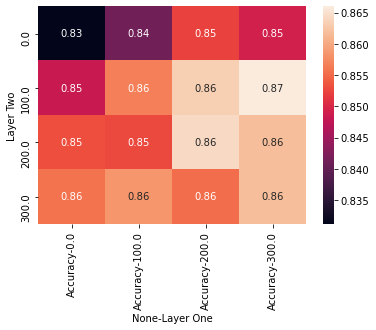

In [15]:
heatmapdf = mlp_scores2d.set_index(['Layer One','Layer Two'])
heatmapdf = heatmapdf.unstack(level=0)
ax = sns.heatmap(heatmapdf, annot=True)

optimizer

In [35]:
def trainModel(model, X_train, y_train, X_valid, y_valid, verbose, optim):
  model.compile(loss="categorical_crossentropy",
    optimizer=optim,
    metrics=["accuracy"])
  #track epoch loss history
  if not verbose:
    history = model.fit(X_train, y_train, epochs=epochs,verbose = 0,
                        validation_data=(X_valid, y_valid))
  else:
    history = model.fit(X_train, y_train, epochs=epochs,
                        validation_data=(X_valid, y_valid))
  return history

In [36]:
def doExperiment(model, dataset, optim, verbose=False, rand_permute=False, plot_hist=True):
  X_train, y_train, X_test, y_test, X_valid, y_valid = split_train_test_valid(dataset, verbose, rand_permute)
  print("--- Training Model ...")
  history = trainModel(model, X_train, y_train, X_valid, y_valid, verbose, optim)
  if plot_hist == True:
    print("--- History:")
    pltHistory(history)
    print("--- Evaluation:")
  return model.evaluate(X_test, y_test)

In [37]:
# mnist
optims = ['sgd', 'Adam', 'RMSprop', 'Adamax']

for optim in optims:
    print('------- ', optim, ' -------')
    doExperiment(mlp_model, fashion_mnist, verbose=False, plot_hist=False, optim=optim)

-------  sgd  -------
--- Training Model ...
313/313 [==============================] - 1s 2ms/step - loss: 0.3260 - accuracy: 0.8808


[0.3260074555873871, 0.8808000087738037]

-------  Adam  -------
--- Training Model ...
313/313 [==============================] - 1s 3ms/step - loss: 0.3397 - accuracy: 0.8861


[0.3397250771522522, 0.8860999941825867]

-------  RMSprop  -------
--- Training Model ...
313/313 [==============================] - 1s 2ms/step - loss: 0.7364 - accuracy: 0.8659


[0.7363842725753784, 0.8658999800682068]

-------  Adamax  -------
--- Training Model ...
313/313 [==============================] - 1s 2ms/step - loss: 0.5542 - accuracy: 0.8912


[0.5542365312576294, 0.8912000060081482]

In [26]:
# fmnist
optims = ['sgd', 'Adam', 'RMSprop', 'Adamax']

for optim in optims:
    print('------- ', optim, ' -------')
    doExperiment(mlp_model, fashion_mnist, verbose=False, plot_hist=False, optim=optim)

-------  sgd  -------
--- Training Model ...
313/313 [==============================] - 0s 1ms/step - loss: 0.3513 - accuracy: 0.9014


[0.35131603479385376, 0.9014000296592712]

-------  Adam  -------
--- Training Model ...
313/313 [==============================] - 1s 2ms/step - loss: 0.4026 - accuracy: 0.8939


[0.40260404348373413, 0.8938999772071838]

-------  RMSprop  -------
--- Training Model ...
313/313 [==============================] - 0s 1ms/step - loss: 0.7783 - accuracy: 0.8773


[0.7783331274986267, 0.8773000240325928]

-------  Adamax  -------
--- Training Model ...
313/313 [==============================] - 0s 1ms/step - loss: 0.7429 - accuracy: 0.8926


[0.7428655028343201, 0.8925999999046326]

In [12]:
def trainModel(model, X_train, y_train, X_valid, y_valid, verbose):
  model.compile(loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"])
  #track epoch loss history
  if not verbose:
    history = model.fit(X_train, y_train, epochs=epochs,verbose = 0,
                        validation_data=(X_valid, y_valid))
  else:
    history = model.fit(X_train, y_train, epochs=epochs,
                        validation_data=(X_valid, y_valid))
  return history

In [13]:
doExperiment(mlp_model, fashion_mnist, verbose=False, plot_hist=False)

--- Training Model ...
313/313 [==============================] - 0s 1ms/step - loss: 0.3718 - accuracy: 0.8862


[0.3717677593231201, 0.8862000107765198]

## CNN Experiments

In [42]:
DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, activation='relu', padding="SAME")

cnn_model = keras.models.Sequential([
DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
keras.layers.MaxPooling2D(pool_size=2),
DefaultConv2D(filters=128),
DefaultConv2D(filters=128),
keras.layers.MaxPooling2D(pool_size=2),
DefaultConv2D(filters=256),
DefaultConv2D(filters=256),
keras.layers.MaxPooling2D(pool_size=2),
keras.layers.Flatten(),
keras.layers.Dense(units=128, activation='relu'),
keras.layers.Dropout(0.5),
keras.layers.Dense(units=64, activation='relu'),
keras.layers.Dropout(0.5),
keras.layers.Dense(units=10, activation='softmax'),
])


### mnist

(54000, 28, 28, 1) train samples
(10000, 28, 28, 1) test samples
(6000, 28, 28, 1) validation samples
(54000, 10) train labels
(10000, 10) test labels
(6000, 10) validation labels
--- Training Model ...
Epoch 1/10
1688/1688 [==============================] - 424s 250ms/step - loss: 1.8132 - accuracy: 0.3502 - val_loss: 0.2149 - val_accuracy: 0.9393
Epoch 2/10
1688/1688 [==============================] - 416s 247ms/step - loss: 0.3523 - accuracy: 0.8964 - val_loss: 0.1243 - val_accuracy: 0.9635
Epoch 3/10
1688/1688 [==============================] - 516s 306ms/step - loss: 0.2132 - accuracy: 0.9421 - val_loss: 0.0750 - val_accuracy: 0.9768
Epoch 4/10
1688/1688 [==============================] - 404s 239ms/step - loss: 0.1540 - accuracy: 0.9615 - val_loss: 0.0622 - val_accuracy: 0.9812
Epoch 5/10
1688/1688 [==============================] - 381s 225ms/step - loss: 0.1168 - accuracy: 0.9686 - val_loss: 0.0592 - val_accuracy: 0.9830
Epoch 6/10
1688/1688 [==============================] - 3

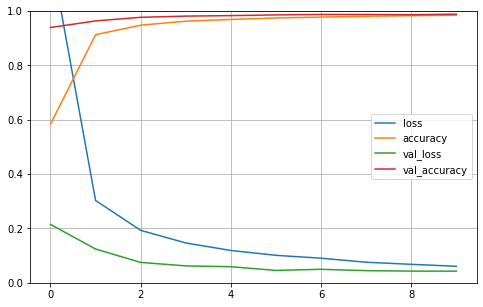

--- Evaluation:
313/313 [==============================] - 13s 42ms/step - loss: 0.0314 - accuracy: 0.9917


[0.03137938678264618, 0.9916999936103821]

In [43]:
doExperiment(cnn_model, mnist, verbose=True)

### fmnist

(54000, 28, 28, 1) train samples
(10000, 28, 28, 1) test samples
(6000, 28, 28, 1) validation samples
(54000, 10) train labels
(10000, 10) test labels
(6000, 10) validation labels
--- Training Model ...
Epoch 1/10
1688/1688 [==============================] - 373s 220ms/step - loss: 1.0935 - accuracy: 0.6361 - val_loss: 0.4310 - val_accuracy: 0.8465
Epoch 2/10
1688/1688 [==============================] - 372s 220ms/step - loss: 0.5416 - accuracy: 0.8230 - val_loss: 0.3762 - val_accuracy: 0.8620
Epoch 3/10
1688/1688 [==============================] - 345s 204ms/step - loss: 0.4560 - accuracy: 0.8510 - val_loss: 0.3479 - val_accuracy: 0.8773
Epoch 4/10
1688/1688 [==============================] - 330s 196ms/step - loss: 0.4162 - accuracy: 0.8628 - val_loss: 0.3541 - val_accuracy: 0.8685
Epoch 5/10
1688/1688 [==============================] - 342s 203ms/step - loss: 0.3849 - accuracy: 0.8752 - val_loss: 0.3038 - val_accuracy: 0.8907
Epoch 6/10
1688/1688 [==============================] - 3

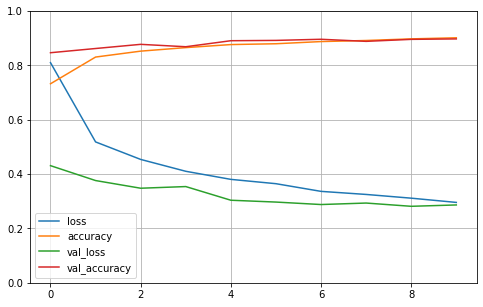

--- Evaluation:
313/313 [==============================] - 13s 42ms/step - loss: 0.2982 - accuracy: 0.9002


[0.2981501519680023, 0.9002000093460083]

In [45]:
doExperiment(cnn_model, fashion_mnist, verbose=True)

### CNN settings

--- Training Model ...
--- History:


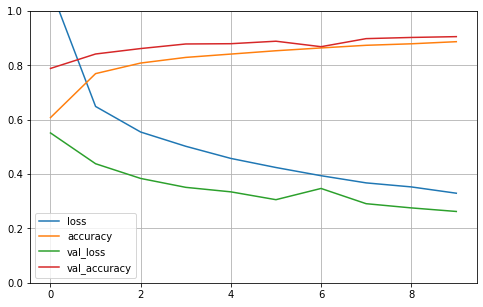

--- Evaluation:
313/313 [==============================] - 119s 380ms/step - loss: 0.2808 - accuracy: 0.8996
--- Training Model ...
--- History:


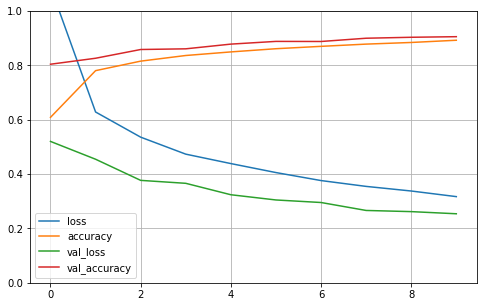

--- Evaluation:
313/313 [==============================] - 118s 376ms/step - loss: 0.2823 - accuracy: 0.9011
--- Training Model ...
--- History:


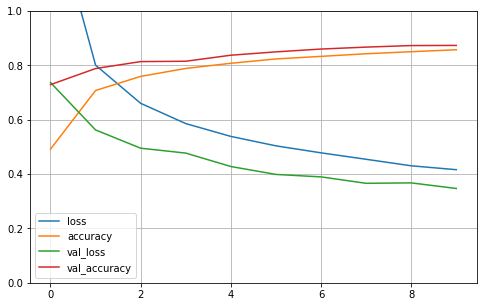

--- Evaluation:
313/313 [==============================] - 13s 42ms/step - loss: 0.3523 - accuracy: 0.8729
--- Training Model ...
--- History:


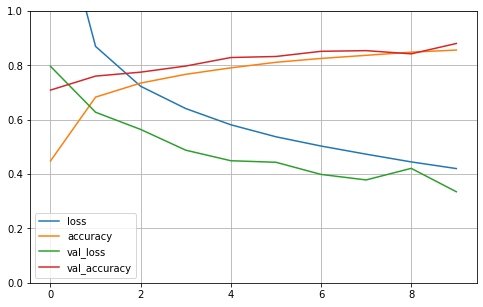

--- Evaluation:
313/313 [==============================] - 5s 16ms/step - loss: 0.3589 - accuracy: 0.8718
--- Training Model ...


KeyboardInterrupt: 

In [7]:
cnn_scores = {}

for kernal_size in [0,1,2,3]:
  for max_pooling_size in [0,1,2,3]:
    DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3+ kernal_size, activation='relu', padding="SAME")
    if not max_pooling_size == 0:
      cnn_model = keras.models.Sequential([
          DefaultConv2D(filters=64, kernel_size=7+kernal_size, input_shape=[28, 28, 1]),
          
          keras.layers.MaxPooling2D(pool_size=max_pooling_size),
          DefaultConv2D(filters=128),
          DefaultConv2D(filters=128),
          keras.layers.MaxPooling2D(pool_size=max_pooling_size),
          DefaultConv2D(filters=256),
          DefaultConv2D(filters=256),
          keras.layers.MaxPooling2D(pool_size=max_pooling_size),
          keras.layers.Flatten(),
          keras.layers.Dense(units=128, activation='relu'),
          keras.layers.Dropout(0.5),
          keras.layers.Dense(units=64, activation='relu'),
          keras.layers.Dropout(0.5),
          keras.layers.Dense(units=10, activation='softmax'),
          ])
    else:
      cnn_model = keras.models.Sequential([
          DefaultConv2D(filters=64, kernel_size=7+kernal_size, input_shape=[28, 28, 1]),
          DefaultConv2D(filters=128),
          DefaultConv2D(filters=128),
          DefaultConv2D(filters=256),
          DefaultConv2D(filters=256),
          keras.layers.Flatten(),
          keras.layers.Dense(units=128, activation='relu'),
          keras.layers.Dropout(0.5),
          keras.layers.Dense(units=64, activation='relu'),
          keras.layers.Dropout(0.5),
          keras.layers.Dense(units=10, activation='softmax'),
          ])
    score = doExperiment(cnn_model, fashion_mnist, verbose=False)
    cnn_scores[max_pooling_size,kernal_size] = score

In [8]:
cnn_scores2d = pd.DataFrame(columns = ['Max Pooling Size', 'Kernel Size', 'Accuracy'])
for k,v in cnn_scores.items():
    cnn_scores2d = cnn_scores2d.append({'Max Pooling Size': k[0], 'Kernel Size':k[1], 'Accuracy':v[1]}, ignore_index = True)

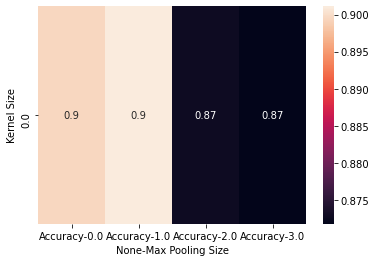

In [9]:
heatmapdf = cnn_scores2d.set_index(['Max Pooling Size','Kernel Size'])
heatmapdf = heatmapdf.unstack(level=0)
ax = sns.heatmap(heatmapdf, annot=True)